# Introducción

Tanto o módulo **Matplotlib** como **Sympy** teñen multitude de ferramentas para traballar con funcións dunha ou varias variables e, máis precisamente, para representar as gráficas asociadas sobre un conxunto de valores dado. Neste guión da práctica 3, revisaremos como reprensetar funcións escalares dunha, dúas e tres variables usando tanto superficies, como curvas de nivel (tamén chamadas isoliñas), superficies ou isosuperfícies (no caso tridimensional). Adicionalmente tamén se revisará como representar liñas no plano e no espazo tridimensional. En todos estos casos, veremos como facer estas representacións gráficas tanto en **Matplotlib** como en **Sympy**.


## Obxectivos

- Representación de funciones de una variable 
- Representación de funcións escalares de varias variables
- Representación gráfica de liñas no espazo tridimensional
- Empregar Matplotlib e Sympy para representar funcións


# Representación gráfica de funcións con Matplotlib

Como xa fixemos na práctica anterior, para usar os módulos **Numpy** e **Matplotlib**, o primeiro que debemos facer é importalos, e posto que usaremos este módulo usando a interface `pyplot` de **Matplotlib**, tamén haberá que importar esta. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Gráficas de funcións dunha variable

As gráficas de funcións dunha variable créanse a partir da avaliación do valor da función nun gran número de puntos almacenados nun vector **Numpy**. Ao usar un número de puntos suficiente, a gráfica da función parecerá suave. Nembargante, hai que entender que o que se está a representar graficamente é unha concatenación de segmentos rectos que unen os puntos que se avaliaron. Por exemplo, para representar as funcións:
$$
f(x) = \sin(x),\qquad g(x)=\cos(x),\qquad x\in[0,4\pi].
$$
o primeiro paso será crear un vector de valores nos que se avalie a función. Para iso, empregase o a función `np.linspace` como segue: 

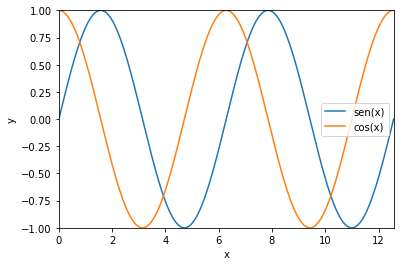

In [2]:
# Creación dos puntos onde se avalía a función
x = np.linspace(0, 4*np.pi, 1000)

# Gráfica de sin(x) e cos(x), cunha etiqueta para cada unha
plt.plot(x, np.sin(x), label='sen(x)')
plt.plot(x, np.cos(x), label='cos(x)')

# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')

# Engadir a lenda (mostrando as etiquetas dos "plot")
plt.legend()

# Definir os límites dos eixes x e y
plt.xlim(x[0], x[-1])
plt.ylim([-1.,1.])

plt.show()

## Representación de curvas no plano
Do mesmo xeito a que unha gráfica dunha función $f:\mathbb{R}\to\mathbb{R}$ é o conxunto de puntos do plano $xy$ que satisfacen $y=f(x)$, isto é,
$$
\text{Gráfica}(f)=\{(x,y)\in\mathbb{R}^2:\ y=f(x)\}
$$

Unha curva no plano pódese definir como un conxunto de puntos que satisface a relación:
$$
\text{Curva}=\{(x,y)\in\mathbb{R}^2:\ x=f(t),\ y=g(t)\text{ con }t\in\mathbb{R}\}=\{(f(t),g(t)):t\in\mathbb{R}\},
$$
onde $t$ é o que se denomina parámetro da representación da curva. 

Por exemplo, para representar a curva
$$
x=\sin(3t),\ y=\cos(5t),\ t\in[0,2\pi]
$$
empregaríase o mesmo comando `plot`:

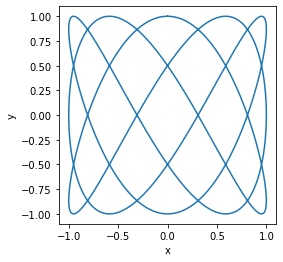

In [40]:
# Creación dos puntos onde se avalía a función
t = np.linspace(0, 2*np.pi, 1000)
x_t = np.sin(3*t)
y_t = np.cos(5*t)
# Gráfica da curva
plt.plot(x_t, y_t)
# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

### Exercicio 4.1
Define tres funcións dunha variable e represéntaas gráficamente no intervalo $[1,2]$ usando cores e estilos de liña diferentes. Para iso consulta a axuda da función `plt.plot`

In [8]:
## O TEU CÓDIGO AQUÍ

## Representación de funcións escalares de varias variables 

Consideremos a función de dúas variables:
$$
f(x, y) = \sin(x) \cos\left(\frac{xy^2}{10}\right),\qquad (x,y)\in[-\pi,\pi]\times[-\pi,\pi].
$$
Non é doado visualizar a forma desta función. Unha das maneiras de obter unha imaxe do comportamento da función é crear unha representación cun mapa de cores ou con curvas de nivel. Para facer isto, hai que crear unha nube de puntos tanto no eixe $x$ como no $y$, para posteriormente evaluar a función neses puntos. Os puntos creados neste proceso de avaliación serán os que finalmente se empreguen para visualizar a función.

In [4]:
N = 50  # 50 puntos en cada dirección dos eixes cartesianos
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

O seguinte paso é crear unha grella (ou nube) de puntos $(x, y)$, para posteriormente avaliar a función: 

In [5]:
X, Y = np.meshgrid(x, y)
f = np.sin(X)*np.cos((X*Y**2)/10)

A primeira posibilidade para representar a función é usando un mapa de cores mediante a función de **Matplotlib** `plt.contourf`:

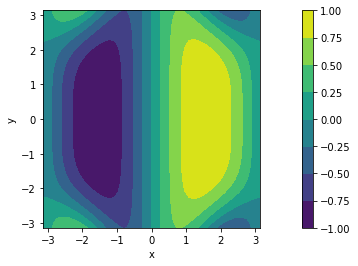

In [43]:
plt.contourf(X, Y, f)
plt.colorbar()  # Engádese a barra de cores cos valores asociados
# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

Para crear unha representación gráfica coas liñas de nivel, usaríase `plt.contour`:

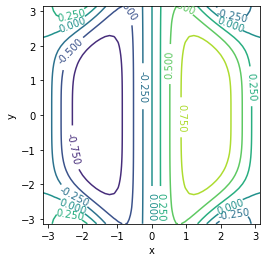

In [44]:
p = plt.contour(X, Y, f)
plt.clabel(p) # Engádese o valor numérico a cada curva de nivel
# Etiquetas dos eixes
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')
plt.show()

A función `plt.contour` admite o argumento opcional `level` co que se pode indicar o número de curvas de nivel a representar ou fixar os valores das curvas a representar. 

Outra maneira de representar as funcións de dúas variables é usar unha gráfica tridimensional con eixes $x$, $y$, e $z=f(x,y)$. Para crear unha gráfica tridimensional en **Matplotlib**, é necesario incluir módulos extra específicos do espazo 3D:

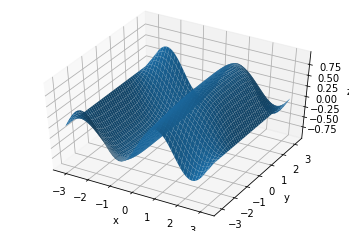

In [6]:
from mpl_toolkits.mplot3d import axes3d
# Creación da figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Representación da superficie z=f(x,y)
surf = ax.plot_surface(X, Y, f)  
# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Punto de vista do observador: elevación
ax.view_init(elev=45)
plt.show()

>**Nota**: No caso de funcións de tres variables, non é posible representar un mapa de cores. O concepto equivalente de curvas de nivel (isoliñas) son as isosuperficies, coas que xa traballamos na práctica 2 anterior (para representar superficies cuádricas coa función `isosurface`), pero que tamén podería ser empregadas para representar calquera outra isosuperficie dunha función arbitraria.

### Exercicio 4.2
Define unha función de dúas variable e represéntaa gráficamente na rexión do plano $[1,2]\times[0,1]$ empregando mapas de cores, curvas de nivel e superficies.

In [46]:
## O TEU CÓDIGO AQUÍ

## Representación de curvas no espazo tridimensional
De forma análoga no espazo tridimensional, unha curva ven definida por tres funcións diferentes:
$$
\text{Curva}=\{(x,y)\in\mathbb{R}^2:\ x=f(t),\ y=g(t),\ z=h(t)\text{ con }t\in\mathbb{R}\}=\{(f(t),g(t),h(t)):\ t\in\mathbb{R}\},
$$
onde $t$ é o que se denomina parámetro da representación da curva.

Por exemplo, para representar graficamente a curva definida
$$
\begin{align*}
f(t)&=(1+0.2\cos(10t))\cos(t),\\
g(t)&=(1+0.2\cos(10t))\sin(t),\\
h(t)&=2t+0.2\sin(10t),
\end{align*}
$$
con $t\in[0,8\pi]$, usaremos a función `plot3D` de **Matplotlib** como segue:

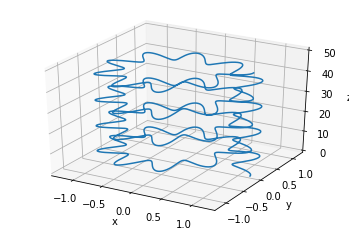

In [8]:
# Creación da figura 3D
fig = plt.figure()
ax = plt.axes(projection="3d")
# Creación dos puntos da curva
t = np.linspace(0., 8.*np.pi, 1000)
x_t = (1+0.2*np.cos(10*t))*np.cos(t)
y_t = (1+0.2*np.cos(10*t))*np.sin(t)
z_t = 2*t+0.2*np.sin(10*t)
# Representación gráfica da curva 3D
p = ax.plot3D(x_t, y_t, z_t)
# Etiquetas dos eixes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

# Representación gráfica con Sympy

Un dos inconvenientes de traballar con **Matplotlib** é que sempre é necesario empregar un conxunto de puntos onde se avalían as funcións que se queren representar e polo tanto, as gráficas non serán máis que aproximacións do que en realidade se quería representar xa foron estas gráficas de funcións, curvas ou superficies.

No que segue, veremos como se pode representar graficamente con **Sympy** os mesmos exemplos revisados anteriormente.

In [9]:
import sympy as sp

### Gráficas de funcións dunha variable

A diferenza con respecto ao uso de **Matplotlib**, en vez de traballar con vectores de números **Numpy**, haberá que definir variables simbólicas para escribir a expresión da función que se quere representar:

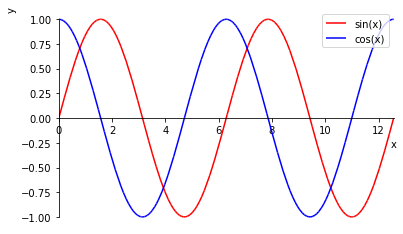

In [11]:
x = sp.symbols('x', real=True)
p = sp.plot(sp.sin(x), sp.cos(x), (x, 0, 4*sp.pi), show=False)
p[0].line_color='r'
p[1].line_color='b'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

### Representación de curvas no plano

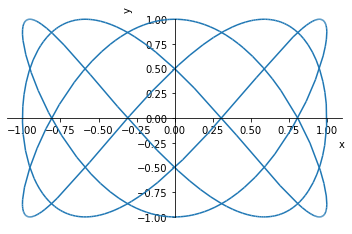

In [62]:
t = sp.symbols('t', real=True)
p = sp.plotting.plot_parametric(sp.sin(3*t), sp.cos(5*t), (t, 0, 2*sp.pi), show=False)
p.xlabel='x'
p.ylabel='y'
p.show()

### Representación de funcións escalares de varias variables

Non é posible representar graficamente mapas de cores ou curvas de nivel con **Sympy**. A única opción posible para representar funcións de dúas variables é representar a superficie $z=f(x,y)$ como segue:

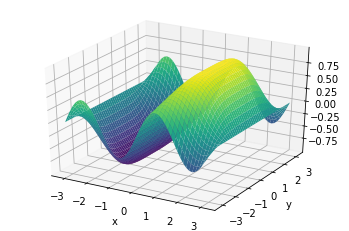

In [15]:
x, y = sp.symbols('x y', real=True)
f = sp.sin(x)*sp.cos((x*y**2)/10)
p = sp.plotting.plot3d(f, (x, -sp.pi, sp.pi), (y, -sp.pi, sp.pi), show=False)
p.xlabel='x'
p.ylabel='y'
p.zlabel='z'
p.show()

### Representación de curvas no espazo tridimensional


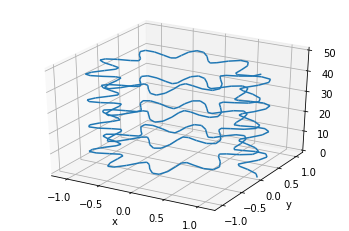

In [16]:
t = sp.symbols('t', real=True)
xt = (1+sp.S(0.2)*sp.cos(10*t))*sp.cos(t)
yt = (1+sp.S(0.2)*sp.cos(10*t))*sp.sin(t)
zt = 2*t+sp.S(0.2)*sp.sin(10*t)
p = sp.plotting.plot3d_parametric_line(xt, yt, zt, (t, 0, 8*sp.pi), show=False)
p.xlabel='x'
p.ylabel='y'
p.zlabel='z'
p.show()

### Exercicio 4.3
A partir das funcións representadas nos exercicios 4.1 e 4.2, fai as mesmas representacións gráficas con **Sympy** (naqueles casos onde sexa posible).

In [30]:
## O TEU CÓDIGO AQUÍ